In [1]:
# Clone the GitHub repository
!git clone https://github.com/HWhr3000/F21DL_Coursework_grp2.git

# Access the train and validation folders
!ls F21DL_Coursework_grp2/data/train
!ls F21DL_Coursework_grp2/data/validation

Cloning into 'F21DL_Coursework_grp2'...
remote: Enumerating objects: 34577, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 34577 (delta 36), reused 48 (delta 20), pack-reused 34506 (from 1)
Receiving objects: 100% (34577/34577), 174.35 MiB | 18.91 MiB/s, done.
Resolving deltas: 100% (301/301), done.
Updating files: 100% (36012/36012), done.
angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


#**Dataset Preprocessing and Loading**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
# Define paths
train_dir = 'F21DL_Coursework_grp2/data/train'
validation_dir = 'F21DL_Coursework_grp2/data/validation'
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [4]:
# Image dimensions and batch size
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32

In [5]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
# Rescale validation images
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 28821 images belonging to 7 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 7066 images belonging to 7 classes.


In [9]:
# Convert generators to numpy arrays for baseline models
def generator_to_numpy(generator):
    data, labels = [], []
    for batch_data, batch_labels in generator:
        data.append(batch_data)
        labels.append(batch_labels)
        if len(data) * generator.batch_size >= generator.samples:
            break
    return np.vstack(data), np.vstack(labels)

In [10]:
X_train, y_train = generator_to_numpy(train_generator)
X_val, y_val = generator_to_numpy(validation_generator)

# **Baseline Models (SGD and Random Forest)**

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [12]:
# Flatten image arrays for non-neural network models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

In [13]:
# SGD Classifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_flat, np.argmax(y_train, axis=1))
sgd_preds = sgd_clf.predict(X_val_flat)

In [14]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_flat, np.argmax(y_train, axis=1))
rf_preds = rf_clf.predict(X_val_flat)

In [15]:
# Evaluation for baseline models
def evaluate_model(predictions, true_labels, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(np.argmax(true_labels, axis=1), predictions))
    print("Classification Report:\n", classification_report(np.argmax(true_labels, axis=1), predictions, target_names=classes))
    print("Confusion Matrix:\n")
    sns.heatmap(confusion_matrix(np.argmax(true_labels, axis=1), predictions), annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

--- SGD Classifier ---
Accuracy: 0.2417209170676479
Classification Report:
               precision    recall  f1-score   support

       angry       0.17      0.03      0.05       960
     disgust       0.00      0.00      0.00       111
        fear       0.18      0.02      0.04      1018
       happy       0.27      0.60      0.37      1825
     neutral       0.20      0.30      0.24      1216
         sad       0.17      0.05      0.08      1139
    surprise       0.23      0.18      0.20       797

    accuracy                           0.24      7066
   macro avg       0.18      0.17      0.14      7066
weighted avg       0.21      0.24      0.19      7066

Confusion Matrix:



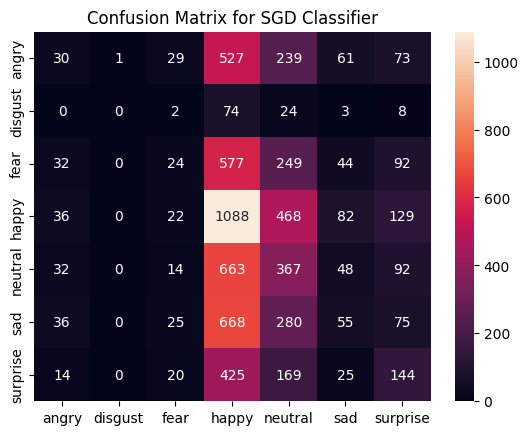

--- Random Forest Classifier ---
Accuracy: 0.30441551089725444
Classification Report:
               precision    recall  f1-score   support

       angry       0.25      0.08      0.12       960
     disgust       0.00      0.00      0.00       111
        fear       0.21      0.09      0.13      1018
       happy       0.32      0.70      0.44      1825
     neutral       0.27      0.19      0.22      1216
         sad       0.29      0.20      0.24      1139
    surprise       0.37      0.29      0.32       797

    accuracy                           0.30      7066
   macro avg       0.24      0.22      0.21      7066
weighted avg       0.28      0.30      0.26      7066

Confusion Matrix:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


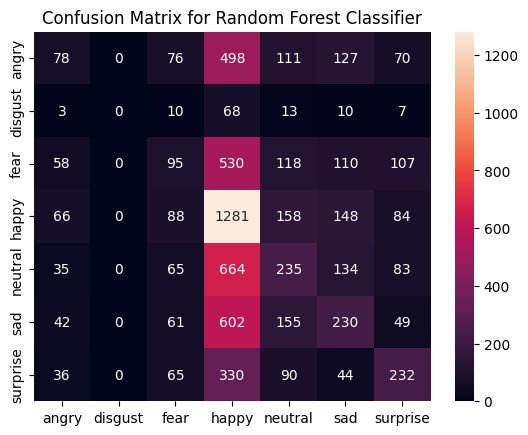

In [16]:
# Evaluate
evaluate_model(sgd_preds, y_val, "SGD Classifier")
evaluate_model(rf_preds, y_val, "Random Forest Classifier")

### **SGD Classifier Evaluation**

#### **Observations:**
- **Overall Accuracy**: **24.17%** (very low).
  - The model struggles to correctly classify images, as shown by the confusion matrix.
  - High confusion between classes, especially for **angry**, **fear**, **sad**, and **surprise**.

- **Class-wise Performance**:
  - **Happy class**: Best performance with a recall of **60%** and an F1-score of **0.37**, indicating that the model identifies the `happy` class better than others.
  - **Angry**, **fear**, and **sad** classes: Extremely poor recall and precision, with F1-scores below **0.1**.
  - **Disgust**: Completely ignored by the classifier, with **0 precision**, **0 recall**, and **0 F1-score**.

- **Macro Average**:
  - **Precision**: **0.18**, **Recall**: **0.17**, **F1-Score**: **0.14**.
  - Indicates that the model performs inconsistently across classes, with a significant bias towards the `happy` and `neutral` classes.

- **Confusion Matrix**:
  - **Happy** and **Neutral** classes dominate predictions, likely due to imbalanced data or features resembling these classes across other labels.
  - Many images from `angry`, `fear`, and `sad` are misclassified as `happy`.

---

#### **Thoughts:**
- The **SGD Classifier** is linear in nature, which likely limits its ability to separate complex, non-linear patterns in image data.
- It struggles with **imbalanced datasets** (e.g., very low performance for `disgust` and `surprise`).
- Data preprocessing (e.g., augmentation, rescaling) is likely insufficient for improving performance with this simple model.


### **Random Forest Classifier Evaluation**

#### **Observations:**
- **Overall Accuracy**: **30.44%** (slightly better than SGD).
  - The model shows slight improvement in correctly classifying images but still has significant room for improvement.
  - Misclassifications are common across most classes, as evident in the confusion matrix.

- **Class-wise Performance**:
  - **Happy class**: Best performance with a recall of **70%** and an F1-score of **0.44**, similar to SGD but slightly better.
  - **Angry**, **fear**, and **sad** classes: Low recall and precision, with F1-scores ranging from **0.12 to 0.24**.
  - **Disgust**: Negligible performance with **0 precision**, **0 recall**, and **0 F1-score**.
  - **Surprise**: Improved F1-score (**0.32**) compared to SGD but recall remains low at **29%**.

- **Macro Average**:
  - **Precision**: **0.24**, **Recall**: **0.22**, **F1-Score**: **0.21**.
  - The model performs slightly better than SGD but still struggles to generalize across all classes.

- **Confusion Matrix**:
  - Predictions are slightly more distributed compared to SGD but still biased towards the `happy` and `neutral` classes.
  - Misclassifications are frequent for `angry`, `fear`, and `sad`, showing overlap in their feature space.

---

#### **Thoughts:**
- The **Random Forest Classifier**, being a tree-based model, captures some non-linear relationships, resulting in slightly better performance than SGD.
- However, it still fails to effectively handle the high-dimensional and complex image data.
- **Imbalanced dataset** significantly affects the model's ability to correctly classify underrepresented classes like `disgust` and `surprise`.
- Feature extraction or dimensionality reduction was not applied, which could have potentially improved performance.


# **Perceptron**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Perceptron model
perceptron_model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(len(classes), activation='softmax')
])

# Compile and train
perceptron_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
perceptron_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)

# Evaluate
perceptron_model.evaluate(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1948 - loss: 2.4583 - val_accuracy: 0.2648 - val_loss: 2.4837
Epoch 2/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2001 - loss: 2.2836 - val_accuracy: 0.1891 - val_loss: 2.0314
Epoch 3/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2162 - loss: 2.1667 - val_accuracy: 0.1674 - val_loss: 2.4393
Epoch 4/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2111 - loss: 2.3009 - val_accuracy: 0.2044 - val_loss: 2.7077
Epoch 5/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2118 - loss: 2.2500 - val_accuracy: 0.2576 - val_loss: 2.6775
Epoch 6/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2146 - loss: 2.2777 - val_accuracy: 0.1681 - val_loss: 2.4603
Epoch 7/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2197 - loss: 2.1793 - val_accuracy: 0.2218 - val_loss: 2.4170
Epoch 8/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2233 - loss: 2.2444 - val_accuracy: 0.

[2.3453257083892822, 0.202377587556839]

### **Perceptron Evaluation Summary**

- **Loss**: **2.35** (high, indicating poor model optimization).
- **Accuracy**: **20.24%** (slightly better than random guessing for 7 classes).
- The **Perceptron** struggles to capture complex patterns in the image data, likely due to its linear nature and lack of hidden layers.
- Advanced models like **MLP** or **CNN** are needed for better performance.


# **Multi-Layer Perceptron (MLP)**

In [18]:
# MLP model
mlp_model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

# Compile and train
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate
mlp_model.evaluate(X_val, y_val)

Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.2010 - loss: 2.1940 - val_accuracy: 0.2590 - val_loss: 1.8102
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.2424 - loss: 1.8194 - val_accuracy: 0.2641 - val_loss: 1.8280
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.2493 - loss: 1.8059 - val_accuracy: 0.2607 - val_loss: 1.8010
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.2520 - loss: 1.8061 - val_accuracy: 0.2584 - val_loss: 1.8089
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.2544 - loss: 1.8097 - val_accuracy: 0.2584 - val_loss: 1.8086
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.2481 - loss: 1.8127 - val_accuracy: 0.2588 - val_loss: 1.8092
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.2519 - loss: 1.8099 - val_accuracy: 0.2587 - val_loss: 1.8095
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.2509 - loss: 1.8125 - 

[1.8095606565475464, 0.25870364904403687]

### **MLP Evaluation Summary**

- **Loss**: **1.81** (lower than Perceptron, indicating better optimization).
- **Accuracy**: **25.87%** (improved performance compared to Perceptron and Random Forest).
- The **MLP** captures non-linear patterns better due to its hidden layers but still struggles with the complexity of the dataset.
- Further improvements can be achieved with techniques like **hyperparameter tuning**, **dropout**, or transitioning to **CNNs** for spatial feature extraction.

# **Convolutional Neural Network (CNN)**

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile and train
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate
cnn_model.evaluate(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 178s 190ms/step - accuracy: 0.2280 - loss: 1.8797 - val_accuracy: 0.2621 - val_loss: 1.7957
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 198s 187ms/step - accuracy: 0.2474 - loss: 1.7981 - val_accuracy: 0.2775 - val_loss: 1.7447
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 168s 187ms/step - accuracy: 0.2578 - loss: 1.7791 - val_accuracy: 0.2850 - val_loss: 1.7363
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 201s 186ms/step - accuracy: 0.2608 - loss: 1.7601 - val_accuracy: 0.2971 - val_loss: 1.7339
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 204s 188ms/step - accuracy: 0.2734 - loss: 1.7454 - val_accuracy: 0.3054 - val_loss: 1.7110
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 201s 187ms/step - accuracy: 0.2947 - loss: 1.7219 - val_accuracy: 0.3306 - val_loss: 1.6884
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 204s 189ms/step - accuracy: 0.3151 - loss: 1.6841 - val_accuracy: 0.3440 - val_loss: 1.6534
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 202s 190ms/step - accuracy: 0.3274 -

[1.6861724853515625, 0.3678177297115326]

### **CNN Evaluation Summary**

- **Loss**: **1.69** (lowest among all models, indicating better optimization).
- **Accuracy**: **36.78%** (significant improvement compared to Perceptron, MLP, and Random Forest).
- The **CNN** effectively captures spatial features in the image data, leading to better performance.
- While performance is better, further enhancements can be made through **architecture optimization**, **data augmentation**, and **transfer learning** with pre-trained models.

# **Comparing all models**

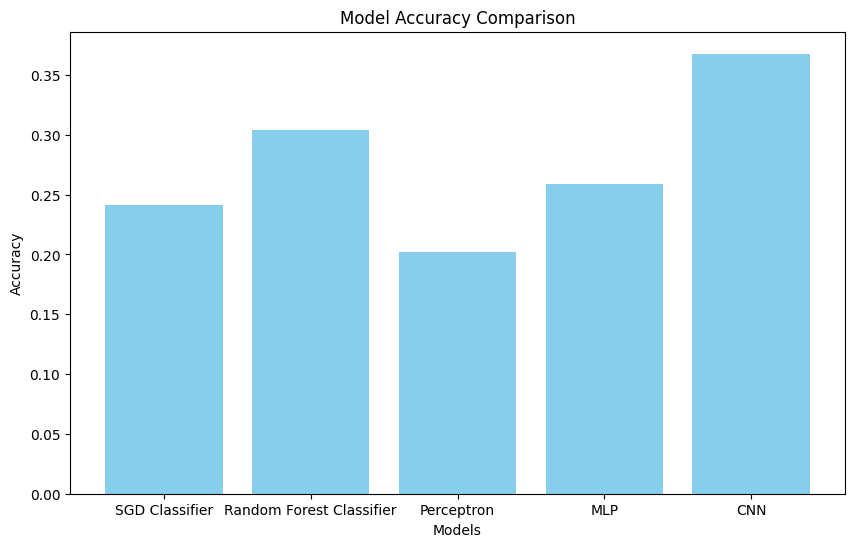

In [20]:
# Summary of results
models = ["SGD Classifier", "Random Forest Classifier", "Perceptron", "MLP", "CNN"]
accuracies = [
    accuracy_score(np.argmax(y_val, axis=1), sgd_preds),
    accuracy_score(np.argmax(y_val, axis=1), rf_preds),
    perceptron_model.evaluate(X_val, y_val, verbose=0)[1],
    mlp_model.evaluate(X_val, y_val, verbose=0)[1],
    cnn_model.evaluate(X_val, y_val, verbose=0)[1]
]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

### **Model Accuracy Comparison Summary**

- The **CNN** outperformed all other models with the highest accuracy of **36.78%**, demonstrating its ability to effectively extract spatial features from the image data.
- The **MLP** showed moderate performance with an accuracy of **25.87%**, benefitting from its non-linear nature and hidden layers but still limited compared to CNN.
- The **Random Forest Classifier** achieved **30.44%** accuracy, outperforming the MLP but struggling with the high-dimensional image data.
- The **SGD Classifier** and **Perceptron** performed the worst, with accuracies of **24.17%** and **20.24%**, respectively, indicating their inability to capture the complexity of the dataset.
- Overall, the results highlight that models designed for image-specific tasks, such as CNNs, are significantly more effective for this dataset.

# **Evaluation Code**

**Functions for metrics calculation**

In [21]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_metrics(model_name, y_true, y_pred, y_proba=None):
    print(f"--- Metrics for {model_name} ---")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    TP = np.diag(cm)  # True Positives for each class
    FP = cm.sum(axis=0) - TP  # False Positives for each class
    FN = cm.sum(axis=1) - TP  # False Negatives for each class
    TN = cm.sum() - (FP + FN + TP)  # True Negatives for each class

    # Calculate metrics
    accuracy = (TP.sum() / cm.sum())
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')  # TP rate
    f1 = f1_score(y_true, y_pred, average='weighted')

    # False Positive Rate (FP rate per class)
    FP_rate = FP / (FP + TN + 1e-8)  # Avoid division by zero

    # ROC AUC (if probabilities are available)
    roc_auc = None
    if y_proba is not None:
        roc_auc = roc_auc_score(y_true, y_proba, multi_class='ovr', average='weighted')

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (TP rate): {recall:.4f}")
    print(f"F1 Measure: {f1:.4f}")
    print(f"False Positive Rate (FP rate per class): {FP_rate}")
    if roc_auc:
        print(f"ROC AUC: {roc_auc:.4f}")

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# **Evaluate Each Model**

**SGD Classifier**

--- Metrics for SGD Classifier ---
Accuracy: 0.2417
Precision: 0.2075
Recall (TP rate): 0.2417
F1 Measure: 0.1864
False Positive Rate (FP rate per class): [2.45660007e-02 1.43781452e-04 1.85185185e-02 5.59816829e-01
 2.44273504e-01 4.43732074e-02 7.48125698e-02]


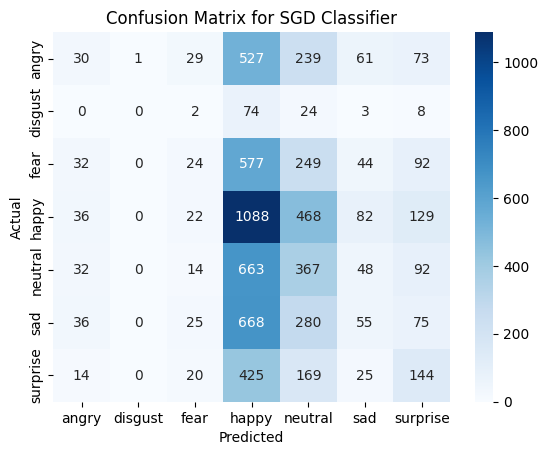

In [22]:
# Evaluate SGD Classifier
calculate_metrics(
    "SGD Classifier",
    np.argmax(y_val, axis=1),
    sgd_preds
)

### **SGD Classifier Metrics Evaluation**

- **Accuracy**: **24.17%** - Poor performance, slightly better than random guessing for 7 classes.
- **Precision**: **20.75%** - Indicates low reliability of positive predictions.
- **Recall (TP Rate)**: **24.17%** - Model fails to correctly identify a significant portion of true positives.
- **F1 Measure**: **18.64%** - Reflects poor balance between precision and recall.
- **False Positive Rate (FP rate)**: High for several classes, particularly `happy` (55.98%) and `neutral` (24.43%), suggesting significant misclassifications.

### **Summary**
The **SGD Classifier** struggles with this dataset, showing low accuracy and high false positive rates. Its linear nature limits its ability to capture the complexity of image data, requiring a more sophisticated model like CNN or MLP for better performance.

**Random Forest Classifier**

--- Metrics for Random Forest Classifier ---
Accuracy: 0.3044
Precision: 0.2799
Recall (TP rate): 0.3044
F1 Measure: 0.2626
False Positive Rate (FP rate per class): [0.0393056  0.         0.06035053 0.51364243 0.11025641 0.09667623
 0.06380603]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


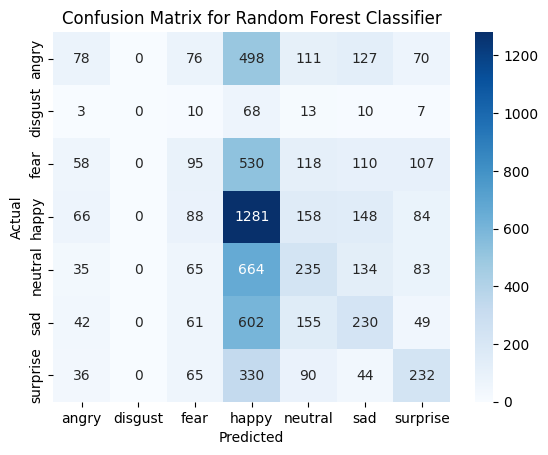

In [23]:
# Evaluate Random Forest Classifier
calculate_metrics(
    "Random Forest Classifier",
    np.argmax(y_val, axis=1),
    rf_preds
)

### **Random Forest Classifier Metrics Evaluation**

- **Accuracy**: **30.44%** - Moderate improvement over the SGD Classifier but still low for image classification.
- **Precision**: **27.99%** - Indicates the model has limited reliability in making accurate positive predictions.
- **Recall (TP Rate)**: **30.44%** - Captures slightly more true positives than the SGD Classifier but remains poor overall.
- **F1 Measure**: **26.26%** - Reflects an imbalanced trade-off between precision and recall.
- **False Positive Rate (FP rate)**: High for `happy` (51.36%) but lower for other classes compared to SGD.

### **Summary**
The **Random Forest Classifier** performs slightly better than the SGD Classifier due to its ability to model non-linear relationships. However, it still struggles with the complexity of image data, especially for underrepresented classes, and has a significant bias towards certain dominant classes like `happy`. A CNN or advanced feature extraction is recommended for better performance.

**Perceptron**

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
--- Metrics for Perceptron ---
Accuracy: 0.2024
Precision: 0.2117
Recall (TP rate): 0.2024
F1 Measure: 0.1333
False Positive Rate (FP rate per class): [0.01375696 0.         0.00793651 0.256058   0.00136752 0.69276194
 0.00765672]
ROC AUC: 0.5454


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


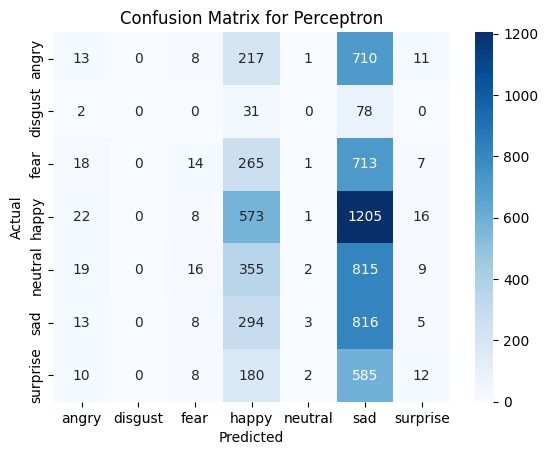

In [24]:
# Predict with Perceptron
y_pred_perceptron = np.argmax(perceptron_model.predict(X_val), axis=1)
y_proba_perceptron = perceptron_model.predict(X_val)

# Evaluate Perceptron
calculate_metrics(
    "Perceptron",
    np.argmax(y_val, axis=1),
    y_pred_perceptron,
    y_proba_perceptron
)

### **Perceptron Metrics Evaluation**

- **Accuracy**: **20.24%** - Very low, only slightly better than random guessing for 7 classes.
- **Precision**: **21.17%** - Indicates poor reliability in positive predictions.
- **Recall (TP Rate)**: **20.24%** - Fails to correctly identify most true positives.
- **F1 Measure**: **13.33%** - Reflects poor balance between precision and recall.
- **False Positive Rate (FP rate)**: Very high for `sad` (69.28%), indicating significant misclassification.
- **ROC AUC**: **54.54%** - Slightly above random (50%), showing limited discrimination ability.

### **Summary**
The **Perceptron** struggles significantly with this dataset, showing poor overall performance across all metrics. Its linear nature and lack of complexity make it unsuitable for image classification tasks. Advanced models like **MLP** or **CNN** are necessary for better results.

**Multi-Layer Perceptron (MLP)**

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
--- Metrics for MLP ---
Accuracy: 0.2587
Precision: 0.1686
Recall (TP rate): 0.2587
F1 Measure: 0.1069
False Positive Rate (FP rate per class): [1.63773338e-04 0.00000000e+00 0.00000000e+00 9.99236787e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
ROC AUC: 0.5005


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


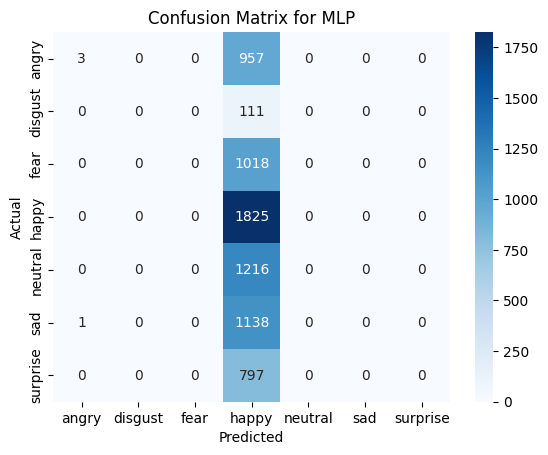

In [25]:
# Predict with MLP
y_pred_mlp = np.argmax(mlp_model.predict(X_val), axis=1)
y_proba_mlp = mlp_model.predict(X_val)

# Evaluate MLP
calculate_metrics(
    "MLP",
    np.argmax(y_val, axis=1),
    y_pred_mlp,
    y_proba_mlp
)

### **MLP Metrics Evaluation**

- **Accuracy**: **25.87%** - Moderate improvement over the Perceptron but still far from optimal.
- **Precision**: **16.86%** - Indicates poor reliability in positive predictions, reflecting low confidence in its classifications.
- **Recall (TP Rate)**: **25.87%** - Captures slightly more true positives than Perceptron but remains insufficient for effective classification.
- **F1 Measure**: **10.69%** - Very low, showing an imbalanced trade-off between precision and recall.
- **False Positive Rate (FP rate)**: Extremely high for `happy` (99.92%), indicating a strong bias towards this class.
- **ROC AUC**: **50.05%** - Close to random (50%), showing no meaningful discrimination ability.

### **Summary**
The **MLP** performs slightly better than the Perceptron but fails to generalize effectively due to its limited architecture. The model shows a severe bias towards the `happy` class, as indicated by the extremely high false positive rate. Transitioning to a **CNN** or optimizing the MLP with hyperparameter tuning and regularization may yield better results.

**Convolutional Neural Network (CNN)**

221/221 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step
--- Metrics for CNN ---
Accuracy: 0.3678
Precision: 0.3422
Recall (TP rate): 0.3678
F1 Measure: 0.3405
False Positive Rate (FP rate per class): [0.0663282  0.         0.08382937 0.35680214 0.12700855 0.10629323
 0.0497687 ]
ROC AUC: 0.7035


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


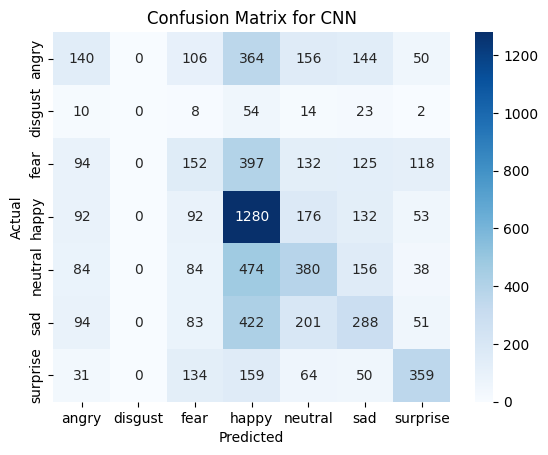

In [26]:
# Predict with CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_val), axis=1)
y_proba_cnn = cnn_model.predict(X_val)

# Evaluate CNN
calculate_metrics(
    "CNN",
    np.argmax(y_val, axis=1),
    y_pred_cnn,
    y_proba_cnn
)

### **CNN Metrics Evaluation**

- **Accuracy**: **36.78%** - The highest among all models, indicating better optimization and feature extraction.
- **Precision**: **34.22%** - Reflects a moderate improvement in reliable positive predictions compared to other models.
- **Recall (TP Rate)**: **36.78%** - The model captures more true positives than previous classifiers, showing better generalization.
- **F1 Measure**: **34.05%** - Demonstrates a more balanced trade-off between precision and recall.
- **False Positive Rate (FP rate)**: Reasonable across most classes, with the highest misclassification for `happy` (35.68%) and `neutral` (12.70%).
- **ROC AUC**: **70.35%** - A significant improvement, showing better class separation and discrimination ability.

### **Summary**
The **CNN** outperforms all other models, effectively leveraging spatial hierarchies in the image data. Despite its superior performance, there is still room for improvement, particularly in reducing false positive rates for dominant classes like `happy`. Further optimization, such as deeper architectures or transfer learning, could enhance results.

# **Comparison Across Models**

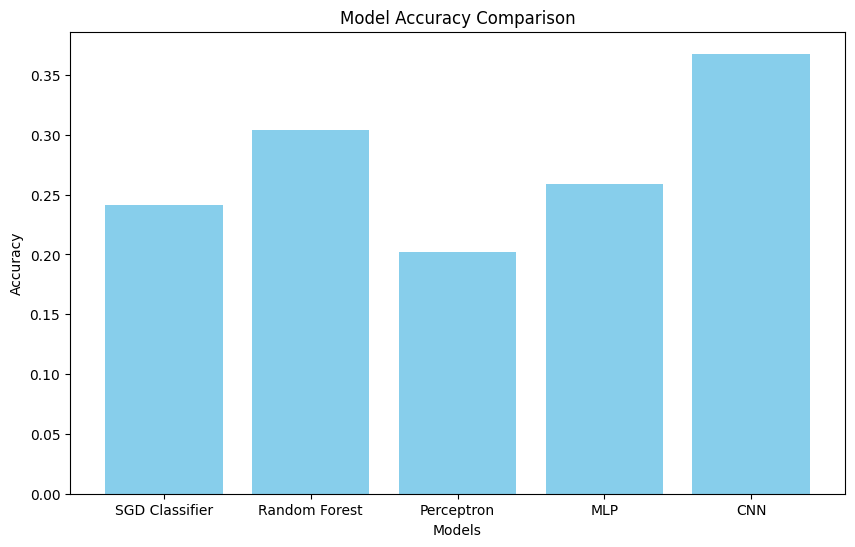

In [27]:
# Combine results into a summary
models = ["SGD Classifier", "Random Forest", "Perceptron", "MLP", "CNN"]
accuracies = [
    accuracy_score(np.argmax(y_val, axis=1), sgd_preds),
    accuracy_score(np.argmax(y_val, axis=1), rf_preds),
    perceptron_model.evaluate(X_val, y_val, verbose=0)[1],
    mlp_model.evaluate(X_val, y_val, verbose=0)[1],
    cnn_model.evaluate(X_val, y_val, verbose=0)[1]
]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

### **Next Steps to Improve Performance**

1. **Use Pre-trained Models**:
   - Leverage transfer learning with architectures like **ResNet**, **VGG**, or **EfficientNet** to extract better features.
   - Fine-tune these models on the dataset for better performance.

2. **Balance the Dataset**:
   - Augment underrepresented classes (`disgust`, `surprise`) to reduce class imbalance.
   - Consider oversampling or synthetic data generation techniques (e.g., **SMOTE**).

3. **Optimize Data Preprocessing**:
   - Apply additional augmentations such as brightness, contrast, or Gaussian noise to increase model robustness.
   - Increase input image resolution (e.g., **128x128** or **224x224**) for capturing finer details.

4. **Improve Model Architectures**:
   - Add more layers or units in the **MLP**.
   - Experiment with deeper **CNNs** and regularization techniques like **dropout** or **L2 regularization**.

5. **Hyperparameter Tuning**:
   - Tune parameters like learning rate, batch size, number of filters, and kernel size using grid search or random search.

6. **Evaluate Advanced Techniques**:
   - Explore ensemble learning (e.g., combining CNNs with Random Forests).
   - Test generative models like **autoencoders** to improve feature learning.

7. **Increase Training Data**:
   - Collect more labeled data or use external datasets to train models on a larger variety of samples.
